In [3]:
import tensorflow as tf


# check version
print('Using TensorFlow v%s' % tf.__version__)

# helpers
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# # fix the seed for consistent interpretation of the results
# import random as python_random
# python_random.seed(0)
# np.random.seed(0)
# tf.random.set_seed(0)

from tqdm.auto import tqdm

import os

import datetime

matplotlib.rcParams.update({'font.size': 16})


Using TensorFlow v2.4.1


In [4]:
def load_training_data(root_dir):
    data = {}
    data['times']                  = np.load(os.path.join(f'{root_dir}', 'times.npy'))
    data['data_processing_params'] = np.load(os.path.join(f'{root_dir}', 'data_processing_params.npz'))
    data['phase']                  = np.load(os.path.join(f'{root_dir}', 'phase.npy'))
    data['mass_ratios']            = np.load(os.path.join(f'{root_dir}', 'mass-ratios.npy'))
    data['approximants']           = np.load(os.path.join(f'{root_dir}', 'approximants.npy'))
    data['amplitude']              = np.load(os.path.join(f'{root_dir}', 'amplitude.npy'))
    
    num_waveforms = data['amplitude'].shape[0]
    indicies = np.arange(num_waveforms)
    
    data['unique_approximants'] = np.unique(data['approximants'])
    
    # mask is a dictionary with keys the same as the approximants
    # this contains the indicies of each approximant
    data['mask'] = {}
    for k in data['unique_approximants']:
        data['mask'].update({k:indicies[k == data['approximants']]})
    
    return data

In [6]:
training_data = load_training_data(root_dir="/Users/spx8sk/work/projects/wispy/dev-stack/training_data")

In [7]:
training_data.keys()

dict_keys(['times', 'data_processing_params', 'phase', 'mass_ratios', 'approximants', 'amplitude', 'unique_approximants', 'mask'])

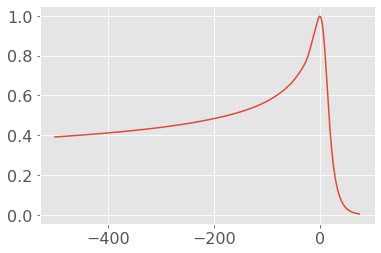

In [8]:
plt.figure()
plt.plot(training_data['times'], training_data['amplitude'][0])

In [31]:
mask = training_data['mask']
times = training_data['times']
mass_ratio = training_data['mass_ratios'][mask['NR']]
ys = training_data['amplitude'][mask['NR']]

input_shape=ys.shape[1]

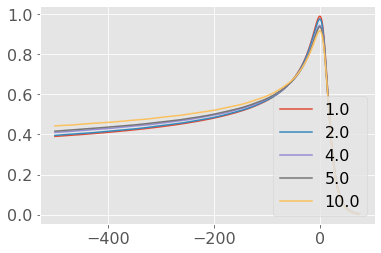

In [14]:
plt.figure()
for i, y in enumerate(ys):
    plt.plot(times, y, label=mass_ratio[i])
plt.legend()

In [557]:
inputs = tf.keras.Input(shape=(input_shape,))
x = tf.keras.layers.Dense(128, activation='tanh')(inputs)
x = tf.keras.layers.Dense(64, activation='tanh')(x)
x = tf.keras.layers.Dense(4, activation='tanh')(x)
x = tf.keras.layers.Dense(64, activation='tanh')(x)
x = tf.keras.layers.Dense(128, activation='tanh')(x)
output1 = tf.keras.layers.Dense(input_shape, name='out1')(x)

input2 = tf.keras.layers.subtract([inputs, output1])
x = tf.keras.layers.BatchNormalization()(input2)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# x = tf.keras.layers.Dense(128, activation='relu')(output1)

x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output2 = tf.keras.layers.Dense(input_shape, name='out2')(x)

input3 = tf.keras.layers.subtract([output1, output2])
x = tf.keras.layers.BatchNormalization()(input3)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# x = tf.keras.layers.Dense(128, activation='relu')(output1)

# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(4, activation='relu')(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output3 = tf.keras.layers.Dense(input_shape, name='out3')(x)

model = tf.keras.Model(inputs, [output1, output2, output3])
# model.compile(optimizer="Adam", loss="mae")
model.compile(optimizer="Adam", loss="mse")
# model.compile(optimizer="Adam", loss=tf.keras.losses.LogCosh(), metrics=['mse'])

In [581]:
inputs = tf.keras.Input(shape=(input_shape,))
x = tf.keras.layers.Dense(128, activation='tanh')(inputs)
x = tf.keras.layers.Dense(64, activation='tanh')(x)
x = tf.keras.layers.Dense(4, activation='tanh')(x)
x = tf.keras.layers.Dense(64, activation='tanh')(x)
x = tf.keras.layers.Dense(128, activation='tanh')(x)
output1 = tf.keras.layers.Dense(input_shape, name='out1')(x)

input2 = tf.keras.layers.subtract([inputs, output1])
x = tf.keras.layers.BatchNormalization()(input2)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output2 = tf.keras.layers.Dense(input_shape, name='out2')(x)

input3 = tf.keras.layers.subtract([output1, output2])
x = tf.keras.layers.BatchNormalization()(input3)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output3 = tf.keras.layers.Dense(input_shape, name='out3')(x)

model = tf.keras.Model(inputs, [output1, output2, output3])
# model.compile(optimizer="Adam", loss="mae")
model.compile(optimizer="Adam", loss="mse")
# model.compile(optimizer="Adam", loss=tf.keras.losses.LogCosh(), metrics=['mse'])

In [582]:
# inputs = tf.keras.Input(shape=(input_shape,))
# x = tf.keras.layers.Dense(128, activation='relu')(inputs)
# # x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(8, activation='relu')(x)

# # x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# output = tf.keras.layers.Dense(input_shape, name='out1')(x)

# model = tf.keras.Model(inputs, output)
# # model.compile(optimizer="Adam", loss=tf.keras.losses.Huber(), metrics=['mse'])
# model.compile(optimizer="Adam", loss=tf.keras.losses.LogCosh(), metrics=['mse'])
# # model.compile(optimizer="Adam", loss='mae', metrics=['mse'])



In [583]:
history = model.fit(ys, ys, epochs=1000, verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 0.8075 - out1_loss: 0.2653 - out2_loss: 0.2753 - out3_loss: 0.2669
Epoch 2/1000
1/1 - 0s - loss: 0.7939 - out1_loss: 0.2713 - out2_loss: 0.2603 - out3_loss: 0.2622
Epoch 3/1000
1/1 - 0s - loss: 0.7455 - out1_loss: 0.2407 - out2_loss: 0.2483 - out3_loss: 0.2565
Epoch 4/1000
1/1 - 0s - loss: 0.6941 - out1_loss: 0.2205 - out2_loss: 0.2301 - out3_loss: 0.2435
Epoch 5/1000
1/1 - 0s - loss: 0.6255 - out1_loss: 0.1950 - out2_loss: 0.2086 - out3_loss: 0.2218
Epoch 6/1000
1/1 - 0s - loss: 0.5547 - out1_loss: 0.1693 - out2_loss: 0.1913 - out3_loss: 0.1941
Epoch 7/1000
1/1 - 0s - loss: 0.4909 - out1_loss: 0.1440 - out2_loss: 0.1761 - out3_loss: 0.1709
Epoch 8/1000
1/1 - 0s - loss: 0.4197 - out1_loss: 0.1193 - out2_loss: 0.1508 - out3_loss: 0.1496
Epoch 9/1000
1/1 - 0s - loss: 0.3480 - out1_loss: 0.0959 - out2_loss: 0.1254 - out3_loss: 0.1267
Epoch 10/1000
1/1 - 0s - loss: 0.2846 - out1_loss: 0.0746 - out2_loss: 0.1053 - out3_loss: 0.1046
Epoch 11/1000
1/1 - 0s - loss

In [584]:
history.history.keys()

dict_keys(['loss', 'out1_loss', 'out2_loss', 'out3_loss'])

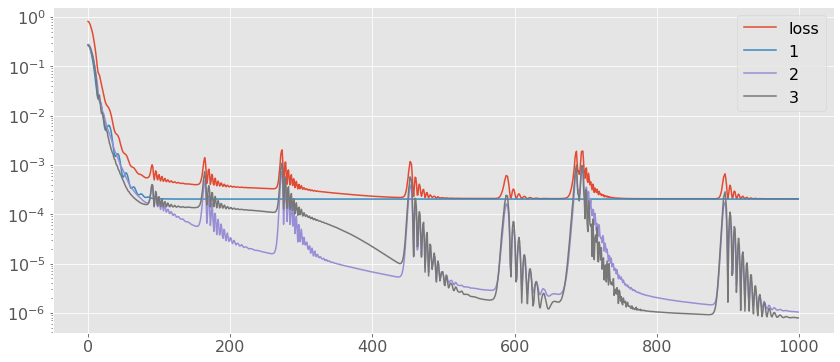

In [585]:
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['out1_loss'], label='1')
plt.plot(history.history['out2_loss'], label='2')
plt.plot(history.history['out3_loss'], label='3')
plt.yscale('log')
plt.legend()

In [586]:
out1, out2, out3 = model.predict(ys)
# out1 = model.predict(ys)

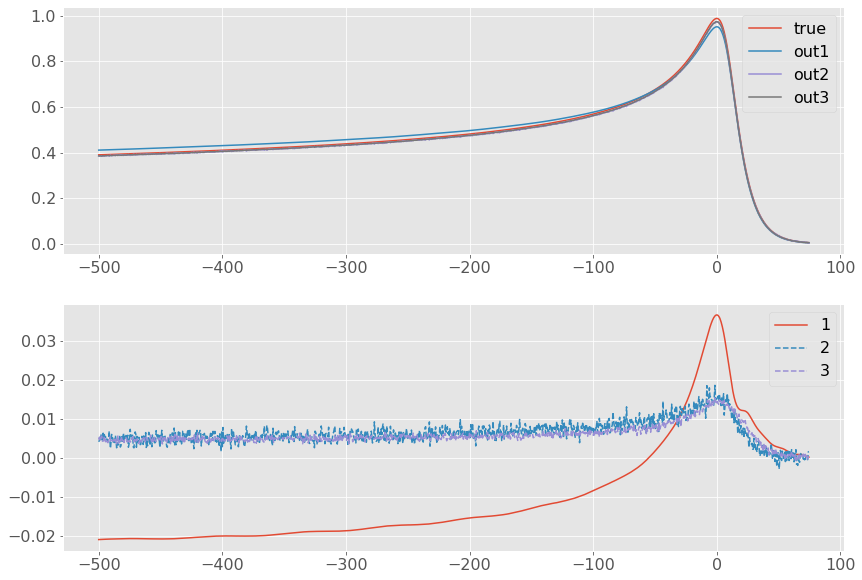

In [587]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(times, ys[0], label='true')
plt.plot(times, out1[0], label='out1')
plt.plot(times, out2[0], label='out2')
plt.plot(times, out3[0], label='out3')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(times, ys[0]-out1[0], label='1')
plt.plot(times, ys[0]-out2[0], ls='--', label='2')
plt.plot(times, ys[0]-out3[0], ls='--', label='3')
plt.legend()

# input mass-ratio , output amp

In [700]:
inputs = tf.keras.Input(shape=(1,))
x = tf.keras.layers.Dense(32, activation='tanh')(inputs)
x = tf.keras.layers.Dense(32, activation='tanh')(x)
x = tf.keras.layers.Dense(32, activation='tanh')(x)
output1 = tf.keras.layers.Dense(input_shape, name='out1')(x)

# input2 = tf.keras.layers.subtract([inputs, output1])
# x = tf.keras.layers.BatchNormalization()(output1)
# x = tf.keras.layers.LayerNormalization()(output1)
x = tf.keras.layers.Dense(32, activation='tanh')(output1)
x = tf.keras.layers.Dense(32, activation='tanh')(x)
x = tf.keras.layers.Dense(32, activation='tanh')(x)
output2 = tf.keras.layers.Dense(input_shape, name='out2')(x)

input2 = tf.keras.layers.subtract([output2, output1])
x = tf.keras.layers.BatchNormalization()(input2)
# x = tf.keras.layers.LayerNormalization()(input2)
x = tf.keras.layers.Dense(32, activation='tanh')(x)
x = tf.keras.layers.Dense(32, activation='tanh')(x)
x = tf.keras.layers.Dense(32, activation='tanh')(x)
output3 = tf.keras.layers.Dense(input_shape, name='out3')(x)

model = tf.keras.Model(inputs, [output1, output2, output3])
# model.compile(optimizer="Adam", loss="mae")
# model.compile(optimizer="Adam", loss=tf.keras.losses.LogCosh(), metrics=['mse'])
model.compile(optimizer="Adam", loss='mse')

In [701]:
history = model.fit(mass_ratio, ys, epochs=1000, verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 0.8080 - out1_loss: 0.2664 - out2_loss: 0.2674 - out3_loss: 0.2742
Epoch 2/1000
1/1 - 0s - loss: 0.7969 - out1_loss: 0.2603 - out2_loss: 0.2625 - out3_loss: 0.2741
Epoch 3/1000
1/1 - 0s - loss: 0.7835 - out1_loss: 0.2536 - out2_loss: 0.2598 - out3_loss: 0.2702
Epoch 4/1000
1/1 - 0s - loss: 0.7683 - out1_loss: 0.2470 - out2_loss: 0.2552 - out3_loss: 0.2660
Epoch 5/1000
1/1 - 0s - loss: 0.7495 - out1_loss: 0.2402 - out2_loss: 0.2479 - out3_loss: 0.2614
Epoch 6/1000
1/1 - 0s - loss: 0.7296 - out1_loss: 0.2329 - out2_loss: 0.2391 - out3_loss: 0.2577
Epoch 7/1000
1/1 - 0s - loss: 0.7066 - out1_loss: 0.2250 - out2_loss: 0.2286 - out3_loss: 0.2529
Epoch 8/1000
1/1 - 0s - loss: 0.6800 - out1_loss: 0.2166 - out2_loss: 0.2163 - out3_loss: 0.2470
Epoch 9/1000
1/1 - 0s - loss: 0.6509 - out1_loss: 0.2077 - out2_loss: 0.2022 - out3_loss: 0.2411
Epoch 10/1000
1/1 - 0s - loss: 0.6189 - out1_loss: 0.1982 - out2_loss: 0.1865 - out3_loss: 0.2342
Epoch 11/1000
1/1 - 0s - loss

In [702]:
history.history.keys()

dict_keys(['loss', 'out1_loss', 'out2_loss', 'out3_loss'])

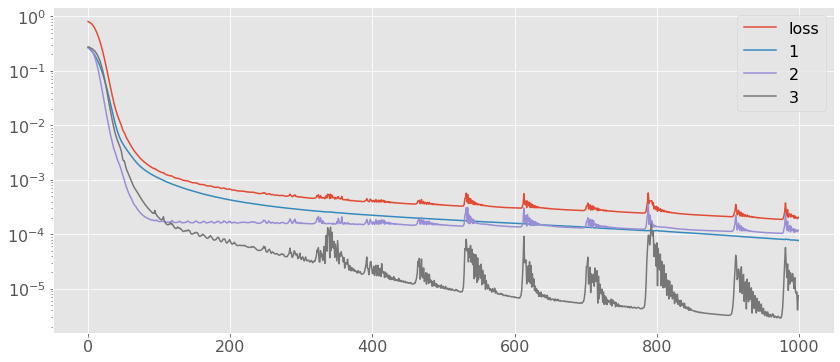

In [703]:
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['out1_loss'], label='1')
plt.plot(history.history['out2_loss'], label='2')
plt.plot(history.history['out3_loss'], label='3')
plt.yscale('log')
plt.legend()

In [704]:
out1, out2, out3 = model.predict(mass_ratio)
# out1, out2 = model.predict(mass_ratio)
# out1 = model.predict(ys)

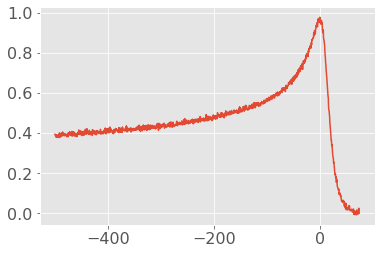

In [705]:
plt.plot(times, out1[0], label='out1')
# plt.plot(times, out3[0], label='out3')

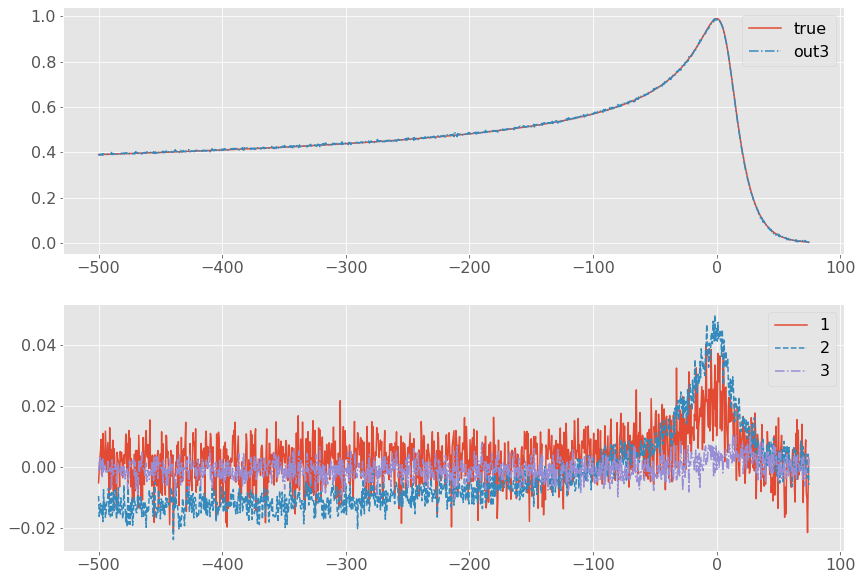

In [707]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(times, ys[0], label='true')
plt.plot(times, out1[0], label='out1')
plt.plot(times, out2[0], label='out2', ls='--')
plt.plot(times, out3[0], label='out3', ls='-.')

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(times, ys[0]-out1[0], label='1')
plt.plot(times, ys[0]-out2[0], ls='--', label='2')
plt.plot(times, ys[0]-out3[0], ls='-.', label='3')
plt.legend()